### K-mans clustering 
- Why K-means?
    - The most popular clustering algorithm in existence
    - It’s relatively simple, intuitive, and easy to conceptualize some Machine learning concepts
    - Choosing K can be done either intuitively, the Silhouette method, the Elbow method
- How it works?
    - Once K (any random number) is determined we select K random points from out dataset and use these points as centroids.
    - Compute the cost function of the distance from the centroid
    - Choose closest and move the controid to the point
    - Repeat computing cost function of the distance / moving the controid until centoid is no longer change
    - The ideal number of cluster is obtained when teh additionof new cluster doesn't significantly increases the cost function

In [12]:
# Import basic necessities
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

In [13]:
file_name ="data/outlier_removed_data.csv"

In [14]:
scored_df = pd.read_csv(file_name)
scored_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263310 entries, 0 to 263309
Data columns (total 94 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   GENDER              263310 non-null  int64  
 1   CREDIT_SCORE        263310 non-null  int64  
 2   AGE                 263310 non-null  int64  
 3   YEAR_2010           263310 non-null  int64  
 4   YEAR_2011           263310 non-null  int64  
 5   YEAR_2012           263310 non-null  int64  
 6   YEAR_2013           263310 non-null  int64  
 7   YEAR_2014           263310 non-null  int64  
 8   YEAR_2015           263310 non-null  int64  
 9   YEAR_2016           263310 non-null  int64  
 10  YEAR_2017           263310 non-null  int64  
 11  YEAR_2018           263310 non-null  int64  
 12  YEAR_2019           263310 non-null  int64  
 13  YEAR_2020           263310 non-null  int64  
 14  YEAR_2021           263310 non-null  int64  
 15  YEAR_2022           263310 non-nul

In [15]:
#see how credit score is spread out
v = scored_df.SCORE_BUCKET.value_counts()
scored_df = scored_df[scored_df.SCORE_BUCKET.isin(v.index[v.gt(2)])]
scored_df.SCORE_BUCKET.value_counts()

4.0    127334
3.0     82324
0.0     25122
2.0     22069
1.0      3215
5.0      3080
Name: SCORE_BUCKET, dtype: int64

<AxesSubplot:xlabel='GENDER', ylabel='SCORE_BUCKET'>

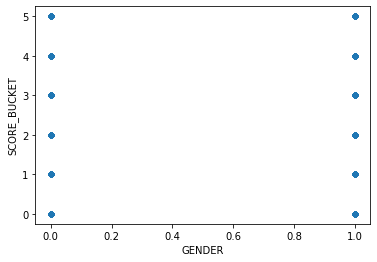

In [16]:
from matplotlib.colors import BoundaryNorm
%matplotlib inline
import matplotlib.pyplot as plt
scored_df.plot(x='GENDER', y='SCORE_BUCKET', kind='scatter')

In [17]:
# I see outliers or zero - Removing it
scored_df = scored_df[scored_df['CREDIT_SCORE'] != 0]

<AxesSubplot:xlabel='GENDER', ylabel='CREDIT_SCORE'>

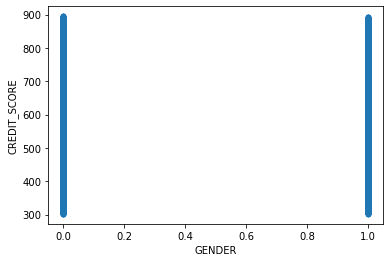

In [18]:
from matplotlib.colors import BoundaryNorm
%matplotlib inline
import matplotlib.pyplot as plt
scored_df.plot(x='GENDER', y='CREDIT_SCORE', kind='scatter')

<AxesSubplot:xlabel='AGE', ylabel='SCORE_BUCKET'>

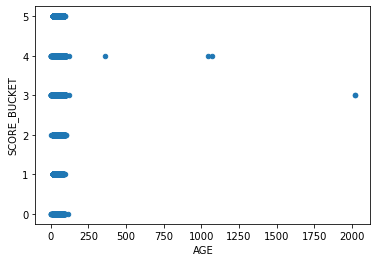

In [19]:
# How about age?
from matplotlib.colors import BoundaryNorm
%matplotlib inline
import matplotlib.pyplot as plt
scored_df.plot(x='AGE', y='SCORE_BUCKET', kind='scatter')

In [20]:
# I see outliers or zero - Removing it
scored_df = scored_df[(scored_df["AGE"] < 100) & (scored_df["AGE"] > 16)]


<AxesSubplot:xlabel='AGE', ylabel='SCORE_BUCKET'>

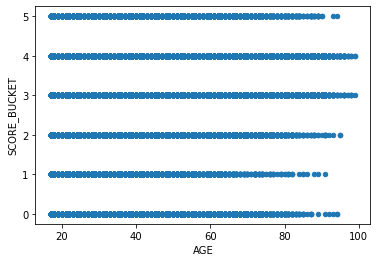

In [21]:
# How about age?
from matplotlib.colors import BoundaryNorm
%matplotlib inline
import matplotlib.pyplot as plt
scored_df.plot(x='AGE', y='SCORE_BUCKET', kind='scatter')

In [22]:
#scored_df.to_csv("data/outlier_removed_data", index = False)